# Heart Disease Dataset



Link to kaggle file:

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm




df = pd.read_csv('\Downloads\archive (2)\heart.csv')


OSError: [Errno 22] Invalid argument: '\\Downloads\x07rchive (2)\\heart.csv'

# What type of information do we check for?

- Nulls (How do we handle them?)
- Duplicates
- Outliers
- Errors (typos, spacing, punctuation)
- Check data types (Do they accurately represent our variables?)
- The size of our data
- High dimensionality (In english I mean lots of columns )


# Approaches and some regular preprocessing steps:

- Depending on the data, we can remove nulls, change them all to zero or convert them to what is deemed fit
- Remove duplicates
- Correct any errors or remove if futile to research
- Correct incorrect data types ( Should age be a decimal or string? )(Although sex is a string, how appropriately will it fit my desired methodology )
- Explore your data! Scatter plots, box plots, count plots, histograms, violin plots etc. It may not always look pretty.
- What variables should we use in our approach. ( Play around with it ) 
- Interaction terms?
- Removing variables
- Regularization techniques or stepwise regression
- Multicolinearity?
- Scaling data
- Binary or one hot encoding may be needed
- Find out what 'algorithms' have inherently high 'assumptions'
- Bias/ Variance Tradeoff
- Understanding which to use between one hot encoding and label encoding. More but haven't seen much
- (Label: 1 2 3 4.  One Hot: 01 001 0001)
- Training and testing: Standard, K fold, Leave one out 
- Tuning parameters for improved accuracy: Tuning K, Lambda, Mean etc.



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
correlation_matrix = df.corr()

correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


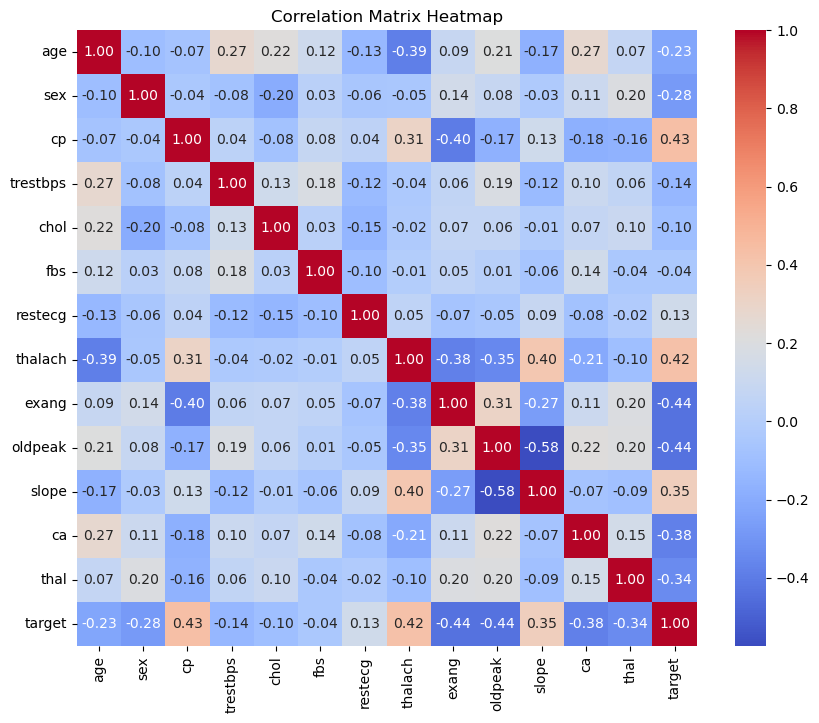

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Highest correlations as they relate the presence of heart disease :

positive correlations between cp and target

positive correlations between thalach and target


IMPORTANT:  IT IS IMPORTANT TO KNOW CORRELATION IS NOT ALWAYS EQUAL TO CAUSATION AND VICE VERSA


# Logistic Regression

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.



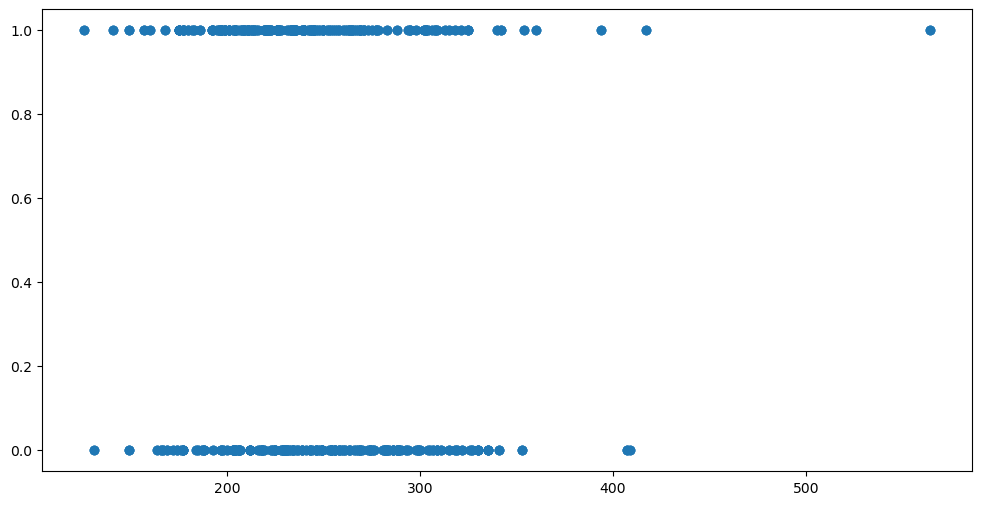

In [7]:
plt.figure(figsize=(12, 6))
plt.scatter(df['chol'], df['target'])
plt.show()

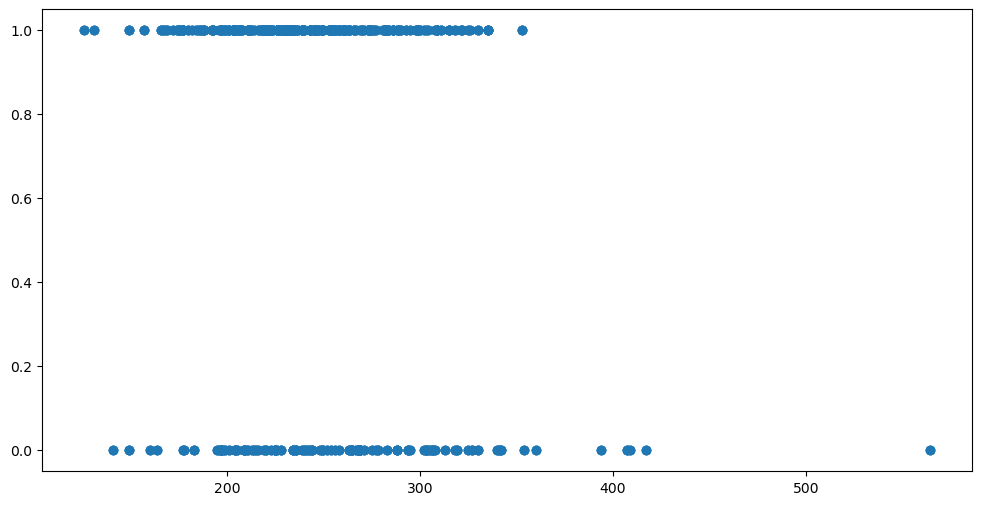

In [8]:
plt.figure(figsize=(12, 6))
plt.scatter(df['chol'], df['sex'])
plt.show()

In [9]:
X = df.drop('target', axis=1)  
y = df['target']  



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
y_pred = model.predict(X_test)

In [13]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
                     index=['Actual Negative (0)', 'Actual Positive (1)'], 
                     columns=['Predicted Negative (0)', 'Predicted Positive (1)'])


,Predicted Negative (0),Predicted Positive (1)
Actual Negative (0),73,29
Actual Positive (1),13,90


### 1. Precision
Precision is the ratio of true positive predictions to the total positive predictions (both true and false).

    Precision = TP / (TP + FP)

Where:
- TP = True Positives (correctly predicted positive cases)
- FP = False Positives (actual negative cases that were incorrectly predicted as positive)

---

### 2. Recall (True Positive Rate or Sensitivity)
Recall is the ratio of true positive predictions to the total actual positives.

    Recall = TPR = TP / (TP + FN)

Where:
- FN = False Negatives (actual positive cases that were incorrectly predicted as negative)

---

### 3. Fall-Out (False Positive Rate)
Fallout measures the proportion of actual negatives that are incorrectly classified as positive.

    Fallout = FPR = FP / (FP + TN)

Where:
- TN = True Negatives (correctly predicted negative cases)

---

### 4. F1 Score
The F1 Score is the harmonic mean of precision and recall.

    F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

---

### 5. Accuracy
Accuracy is the ratio of correctly predicted instances to the total instances.

    Accuracy = (TP + TN) / (TP + TN + FP + FN)

---

### 6. Specificity (True Negative Rate)
Specificity measures the proportion of actual negatives that are correctly identified.

    Specificity = TNR = TN / (TN + FP)

---

### 7. True Positive Rate (TPR)
True Positive Rate is the ratio of correctly predicted positive observations to all actual positives.

    TPR = TP / (TP + FN)

---

### 8. True Negative Rate (TNR)
True Negative Rate is the ratio of correctly predicted negative observations to all actual negatives.

    TNR = TN / (TN + FP)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



# Linear Regression

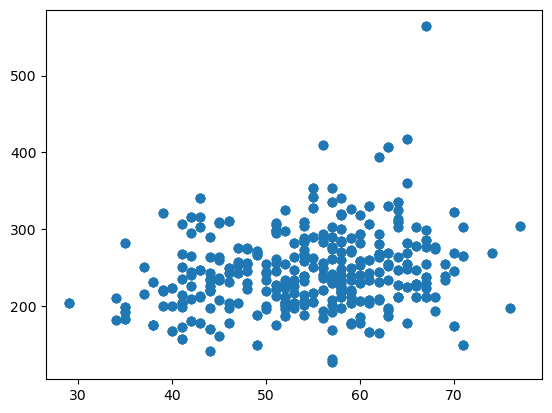

In [15]:
plt.scatter(df['age'], df['chol'])
plt.show()


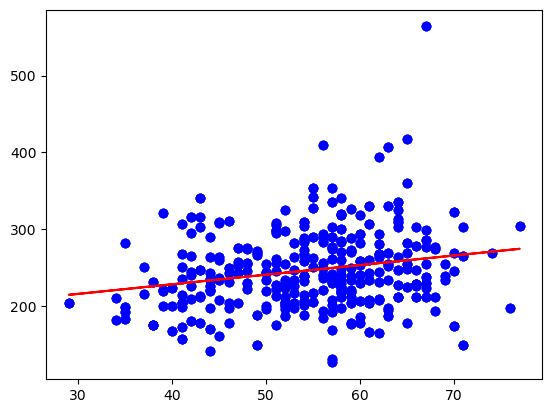

In [16]:
X = df['age'].values.reshape(-1, 1)  
y = df['chol'].values 


model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(df['age'], df['chol'], color='blue', label='Data')

plt.plot(df['age'], y_pred, color='red', label='Linear Regression Line')

plt.show()


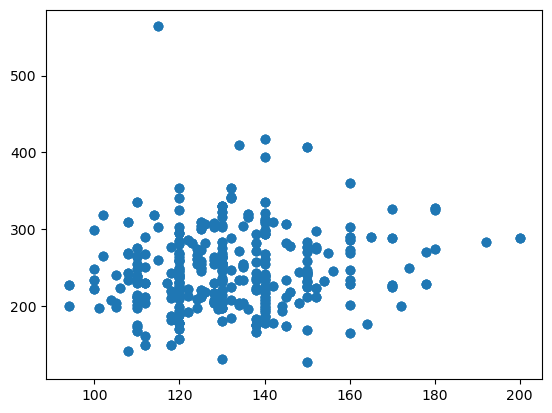

In [17]:
plt.scatter(df['trestbps'], df['chol'])
plt.show()


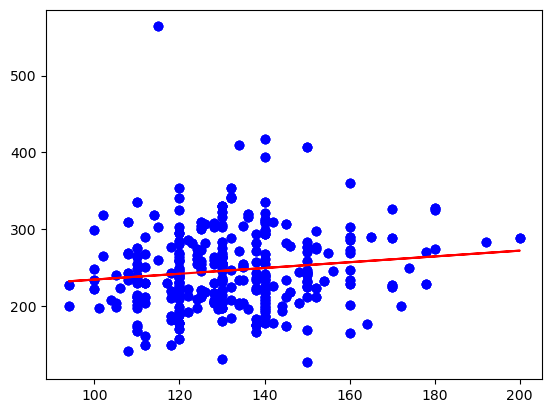

In [18]:
X = df['trestbps'].values.reshape(-1, 1)  
y = df['chol'].values  

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(df['trestbps'], df['chol'], color='blue', label='Data')

plt.plot(df['trestbps'], y_pred, color='red', label='Linear Regression Line')

plt.show()

In [19]:
X2 = df[['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y2 = df['chol']  

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=43)

In [20]:
model = LinearRegression(fit_intercept = True)
model.fit(X_train2, y_train2)

y_pred2 = model.predict(X_test2)

mse = mean_squared_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)

print("Model Intercept:")
print(model.intercept_) 
print()
print("Model Coefficients:")
print(model.coef_)
print()
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Model Intercept:
123.84580822498987

Model Coefficients:
[  1.25677675 -24.35500572  -3.6643841    0.06931915   1.17903667
 -11.43055411   0.275427     5.74657832   2.22821799   3.91069877
   0.65539421   8.80133571]

Mean Squared Error: 2095.8704783339217
R-squared: 0.0679139519887556


An example of some of the predictors deemed significant by the model at alpa = .05 would be age and sex among some others.  

## An example of how they would be interpretted goes as such:

biking -0.200133: For each additional increase in biking, heart disease risk will decrease by approximately -.200 units, holding other variables constant.

smoking 0.178334: For each additional increase in smoking, heart disease risk will increase by approximately .17units. 


Template: For each additional 1 unit increase in [Predictor], the [Dependent Variable] is expected to increase (or decrease) by approximately [Coefficient Value] units, holding all other variables constant.

R-squared: Does not account for the number of predictors. A high R-squared 
  can result from simply adding more predictors, risking overfitting (good fit to training data but poor on unseen data).
  
  
Adjusted R-squared: Accounts for the number of predictors relative to the sample size, evaluating the trade-off between model fit and complexity. It penalizes unnecessary predictors. It  decreases as a result unlike regular R squared

- Overall p value is below significance level and individual p values is as well.
- Adjusted r squared is very high at 97%
- RMSE is 0.6  Need more information about the data ( specifically the target) but a lower rmse is better. Tells you how far predicted values are from true ones. To get MSE square this